In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
import re
%matplotlib inline

In [2]:
# dados TODOS os rois
ku80_allcells = pd.read_csv("data/pc_celulas.csv")
# ----------------------------------------------------------------------------------------------------------------------------------
def coef_pc(data,nome_data):
    '''Calcula coeficiente de pearson das colunas id_first e id_second da data selecionada com o nome da data'''
    first_array = data['id_gh2ax'] 
    second_array = data['id_fak'] 
    pearson_first_second = np.corrcoef(first_array, second_array)[0][1]
    print("O coeficiente de pearson do: " + str(nome_data) + " é " + str(pearson_first_second))
    string_para_print = ("Correlação de pearson: \n" + str(pearson_first_second))
    return string_para_print
# ----------------------------------------------------------------------------------------------------------------------------------

In [3]:
ku80_allcells.head()

,Unnamed: 0,prot,tto,nucleo,nrois,pc_gh2ax_ku80,pc_fak_ku80,pc_gh2ax_fak
0,0,ku80,dox,0,130,0.827617,0.660611,0.903905
1,1,ku80,dox,1,65,0.811023,0.725949,0.931488
2,2,ku80,dox,0,68,0.976183,0.936015,0.950105
3,3,ku80,dox,0,18,0.672473,0.435306,0.671480
4,4,ku80,dox,1,17,0.507610,0.514249,0.782965


In [4]:
maisquequatro = ku80_allcells[ku80_allcells['nrois'] >= 4]

dox_sc_filt =  (maisquequatro['tto'] == 'dox_sc')
dox_sifak_filt =  (maisquequatro['tto'] == 'dox_sifak')

dox_sc_gh2axku80_pc  = maisquequatro.loc[dox_sc_filt, 'pc_gh2ax_ku80']
dox_sc_gh2axfak_pc  = maisquequatro.loc[dox_sc_filt, 'pc_gh2ax_fak']
dox_sc_fakku80_pc  = maisquequatro.loc[dox_sc_filt, 'pc_fak_ku80']

dox_sifak_gh2axku80_pc  = maisquequatro.loc[dox_sifak_filt, 'pc_gh2ax_ku80']
dox_sifak_gh2axfak_pc  = maisquequatro.loc[dox_sifak_filt, 'pc_gh2ax_fak']
dox_sifak_fakku80_pc  = maisquequatro.loc[dox_sifak_filt, 'pc_fak_ku80']

t=2.314, p=0.02367
*


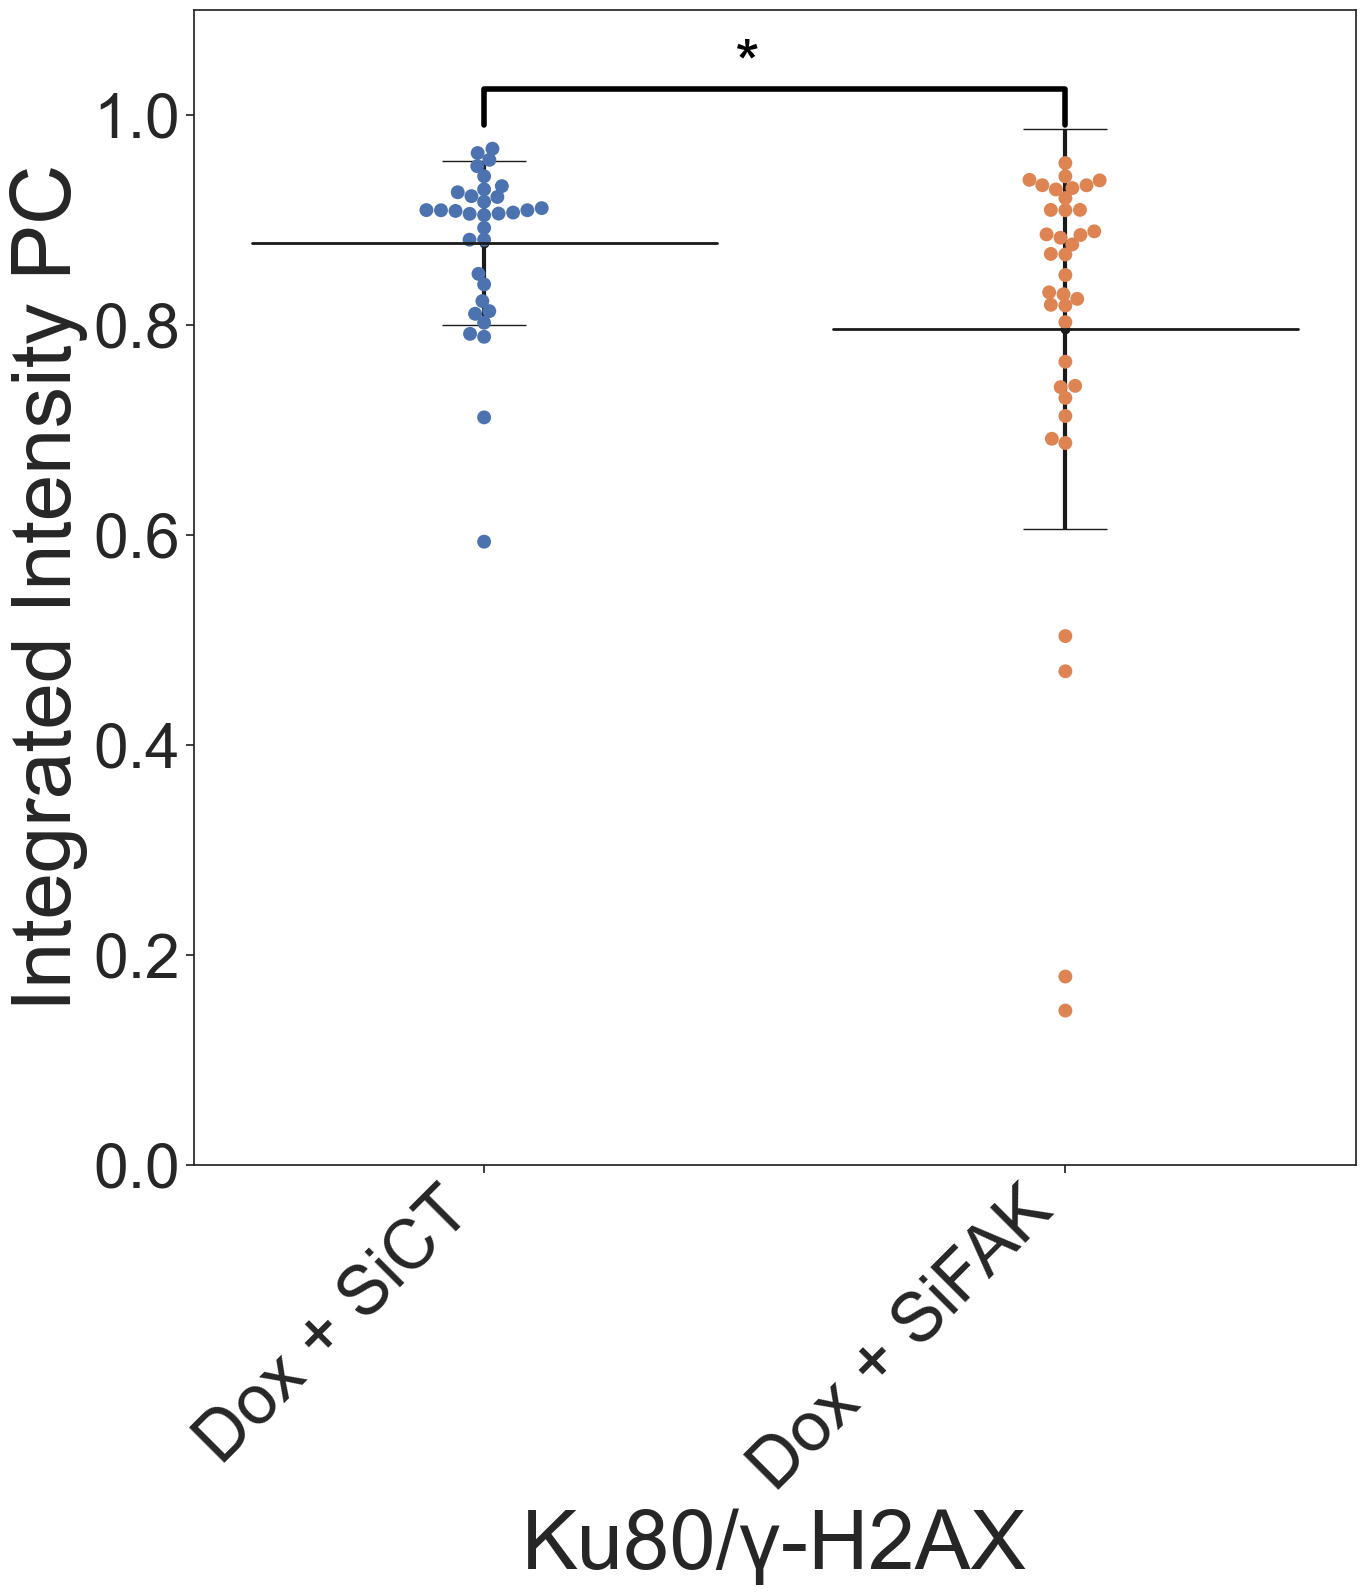

In [5]:
dataimage = maisquequatro
dataimage = dataimage.drop(dataimage.index[dataimage['tto'] == 'dox'])
dataimage = dataimage.drop(dataimage.index[dataimage['tto'] == 'dox_pf'])
dataimage = dataimage.drop(dataimage.index[dataimage['tto'] == 'dox_dmso']) 
#----------------------------------
grupo1 = dox_sc_gh2axku80_pc
grupo2 = dox_sifak_gh2axku80_pc

#-----------------------
nome_figura = 'swarmplot_pc_cells_ku80gh2ax_ii_si v4'

label_eixo_y = 'Integrated Intensity PC'
label_eixo_x = 'Ku80/γ-H2AX'
tamanho_label = 60
other_label = 40
#ttest groups


# sns.set_context("paper")


def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.07 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':100,'shrinkB':100,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+.17), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1]


sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20
sns.despine()
sns.set_style("ticks")

ax = sns.swarmplot(x="tto", y="pc_gh2ax_ku80", data=dataimage,size=10)


# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="pc_gh2ax_ku80",
            data=dataimage,
            showfliers=False,
            showbox=False,
            showcaps=False, 
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

#plt.title(' ', fontsize =80)
plt.xticks([0,1],['Dox + SiScramble', 'Dox + SiFAK'])
labels = ['Dox + SiCT', 'Dox + SiFAK']
ax.set_xticklabels(labels, fontsize=tamanho_label-10, rotation=45, ha='right')
ax.tick_params(axis='y', which='major', labelsize=tamanho_label-15)
# aqui você controla a escala da fonte



means1 = [grupo1.mean(), grupo2.mean()]
stds1 = [grupo1.std(), grupo2.std()]

plt.errorbar(x, means1, stds1, fmt='ok', capsize= 30, linewidth = 3)



# chamando def para os traços
traco(ttesting(grupo1,grupo2),x[0:2],[.78,.07],.0)
# traco(ttesting(grupo3,grupo4),x[2:4],[.86,.8],0)

plt.ylim(0, 1.1)
#plt.margins(y=4)

plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
# plt.tight_layout()
plt.show()